## 1. Introduction

### 人工智慧的分級

- 第一級：自動控制
- 第二級：探索推論、運用知識
- 第三級：機器學習
- 第四級：深度學習

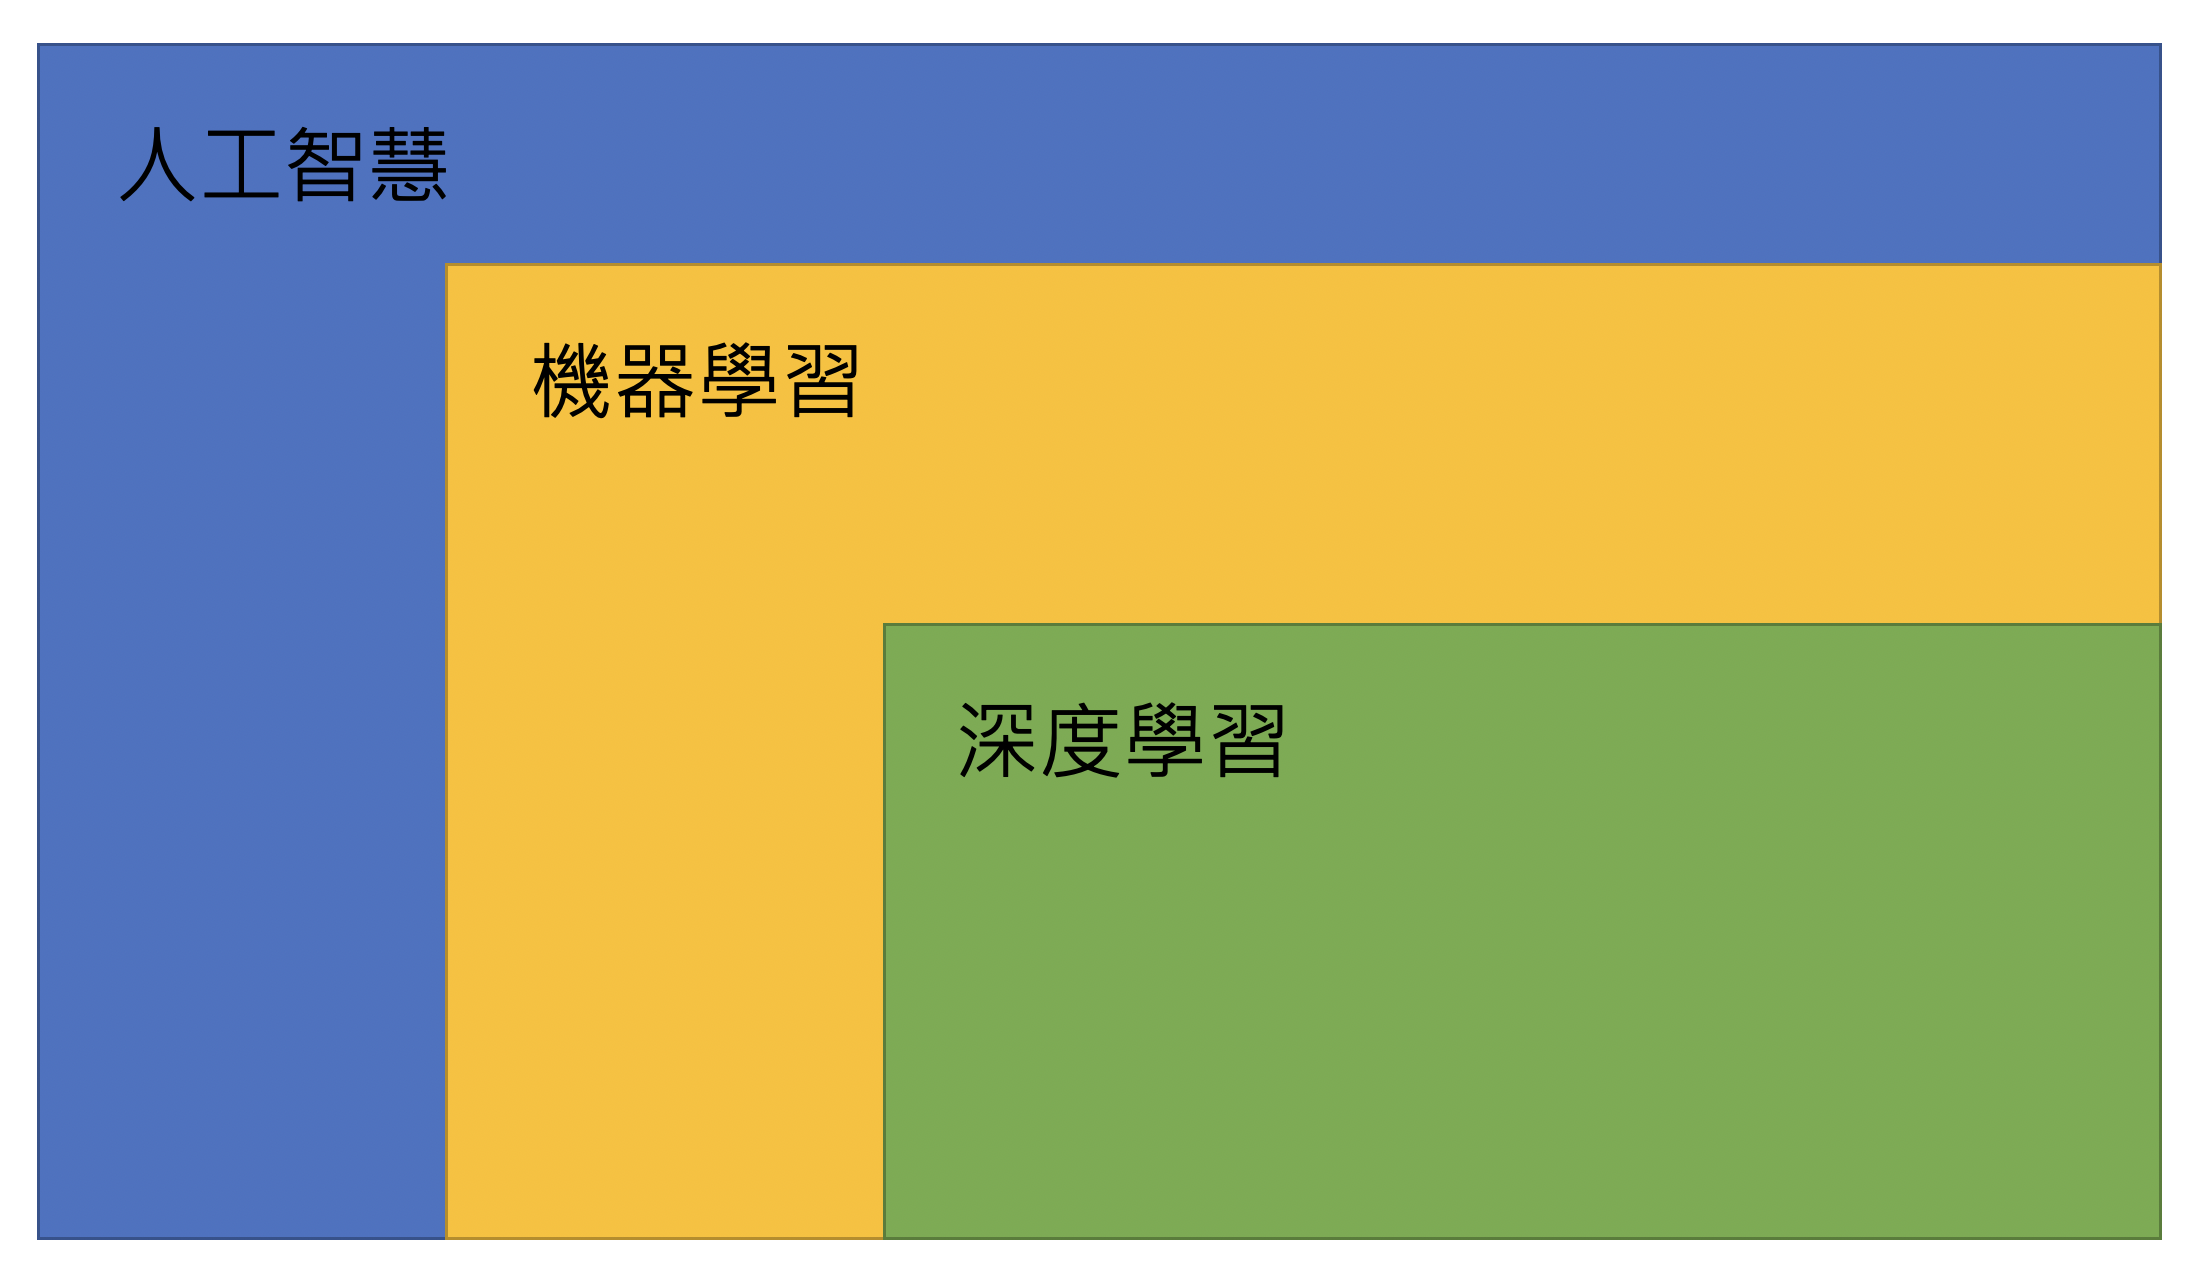

機器學習可以分成三種：

- 監督式學習：從過去標記過的資料來進行訓練模型，這個模型可以預測沒見過的數據

  例如：訓練大量的電子郵件，跟機器說哪些是垃圾郵寄哪些不是，請機器去預測未來的郵件是否是垃圾郵件

- 非監督式學習：給予資料卻不給與正確的答案，讓模型從資料中找尋潛在的規則

  例如：由於人力標示成本耗時耗力，給予機器很多動物的圖片來找尋分類規則

- 強化式學習：讓機器學習當前的狀態，通常包含獎懲機制。

  例如：請機器下圍棋，最後跟機器說是輸還是贏；讓電腦玩馬力歐遊戲
  
  類似人類學習的過程，如果犯法會有懲罰，如果做好事會得到別人的稱讚


## 2. Model Building Workflow

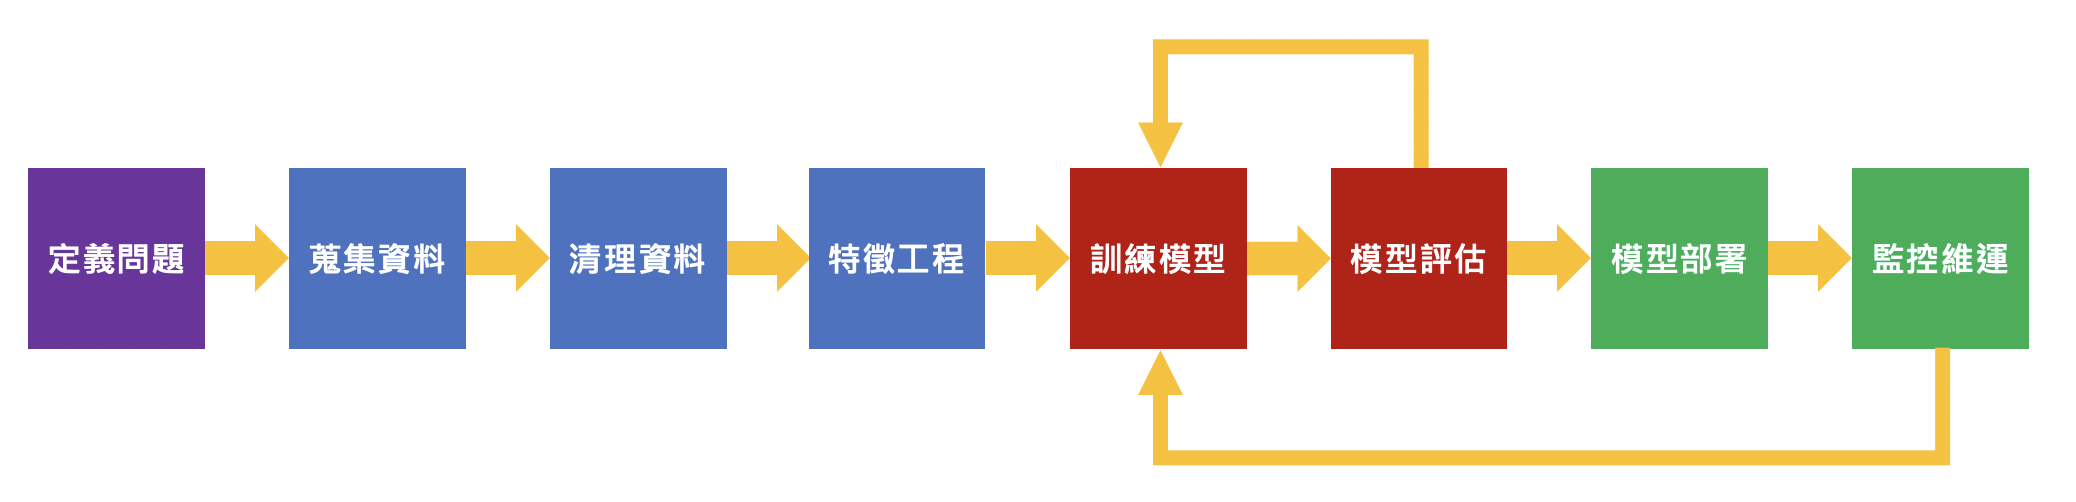

模型開發流程可以粗略分成以上幾個步驟：

- 定義問題：一開始與需求方討論和定義想要解決的問題

- 蒐集資料：蒐集需要訓練的資料或是答案，可能採用爬蟲或從資料庫拿取等方式

- 清理資料：這些資料很有可能格式不一致，或是有可能有空值的情形需要進行資料處理

- 特徵工程：這通常需要 Domain Knowledge，對於資料有相當程度地了解的人，對資料萃取新的特徵以增加模型準度

- 訓練模型：此階段耗費的時間長短會決定於選擇的演算法、資料樣本大小、硬體資源(是否有GPU)等等

- 模型評估：開發者會依照問題選擇不同的評估方式，通常會有一個 baseline 成效，接著開發者的工作是想方設法地超越它

- 模型部署：若模型成效已經達到需求方滿意的水準之後，就會讓模型上線並實際應用

- 監控維運：模型開發後並不是結束，而是另一個開始，通常開發者需要肩負維運的責任
     
  通常隨著時間模型成效會下降，這時候就需要有 re-train 的機制，讓模型重新進行訓練

此外，箭頭的指向也可能會變動，僅是提供大致方向參考

## 3. Evaluating Models Performance

由於我們需要有指標來衡量一個模型的好壞，而問題可以粗略分成「分類」和「回歸」問題

根據不同的問題，我們所選用的衡量指標也會不同

### 3.1 混肴矩陣(Confusion Matrix)
如果分類問題假設只有分真和假，左邊是代表實際的情況，上面是代表預測的情況

False Positive 是 Type Ⅰ Error

False Negative 是 Type Ⅱ Error，通常型二錯誤是比較嚴重的錯誤

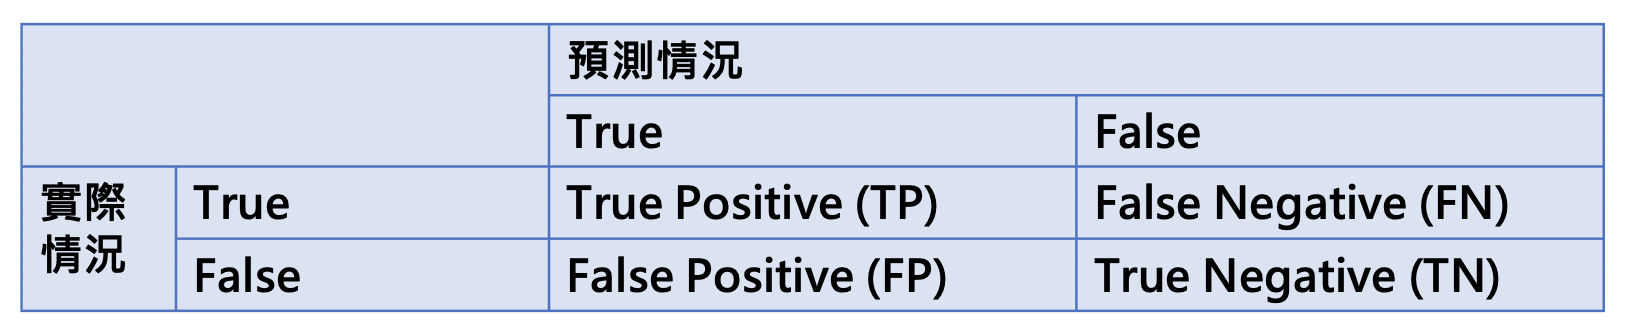

- Accuracy: 準確率，計算正確預測的佔比
  $$ accuracy = \dfrac{TP+TN}{TP+FN+FP+TN}$$
- Precision: 精準率，計算在預測情況為真，實際情況為真的佔比
  $$ precision = \dfrac{TP}{TP+FP}$$
- Recall: 召回率，計算在實際情況為真，預測情況為真的佔比
  $$ recall = \dfrac{TP}{TP+FN}$$
- F1-Score: 是 percision 和 recall 的調和平均，會考慮兩個指標
  $$ F1-score = \dfrac{2}{\dfrac{1}{precision}+\dfrac{1}{recall}}$$ or $$ F1-score = \dfrac{2 \times precision \times recall }{precision + recall}$$

為什麼我們要有不同的指標，難道不能只看準確率(Accuracy)嗎？

假設有一個模型預測癌症，一萬人之中真實只有10人獲得癌症，因此該模型都只要回覆健康，準確率高達 99.90％

但這並不是我們所想要的，我們就是想要找出誰有得癌症！準確率再高也解決不了醫生的需求，根本只是盲猜
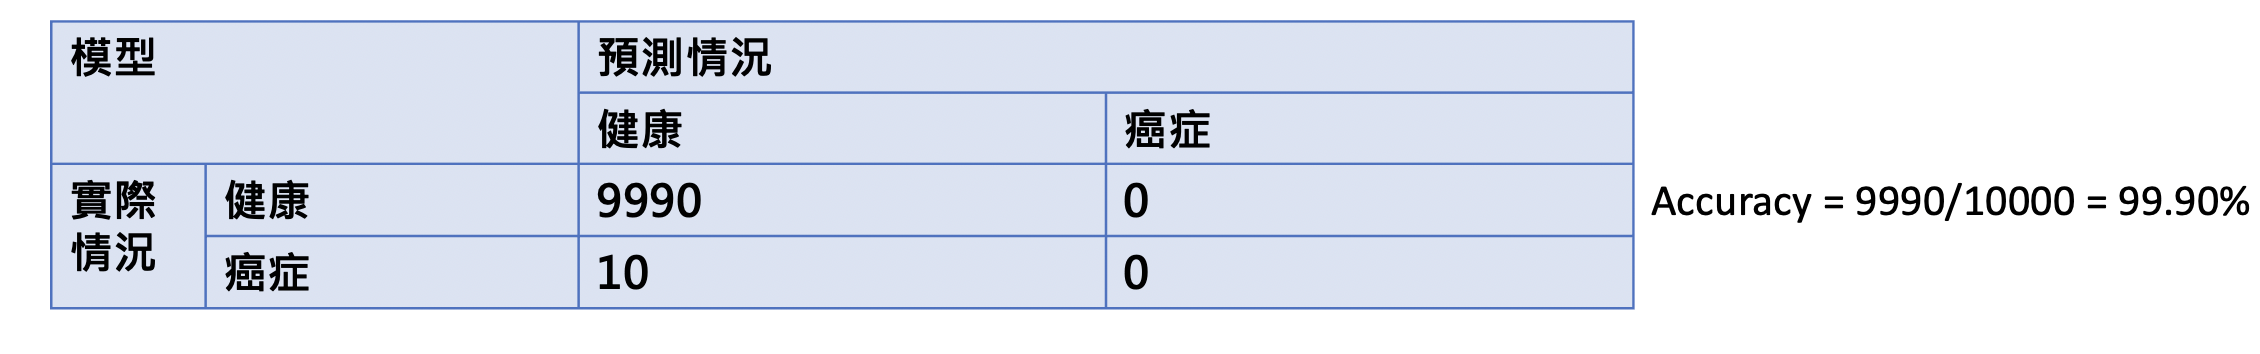

在此，癌症病患是我們想要預測的事情，很顯然地，由於沒有判斷出任何一個有癌症的病患，使用其他指標均會 0

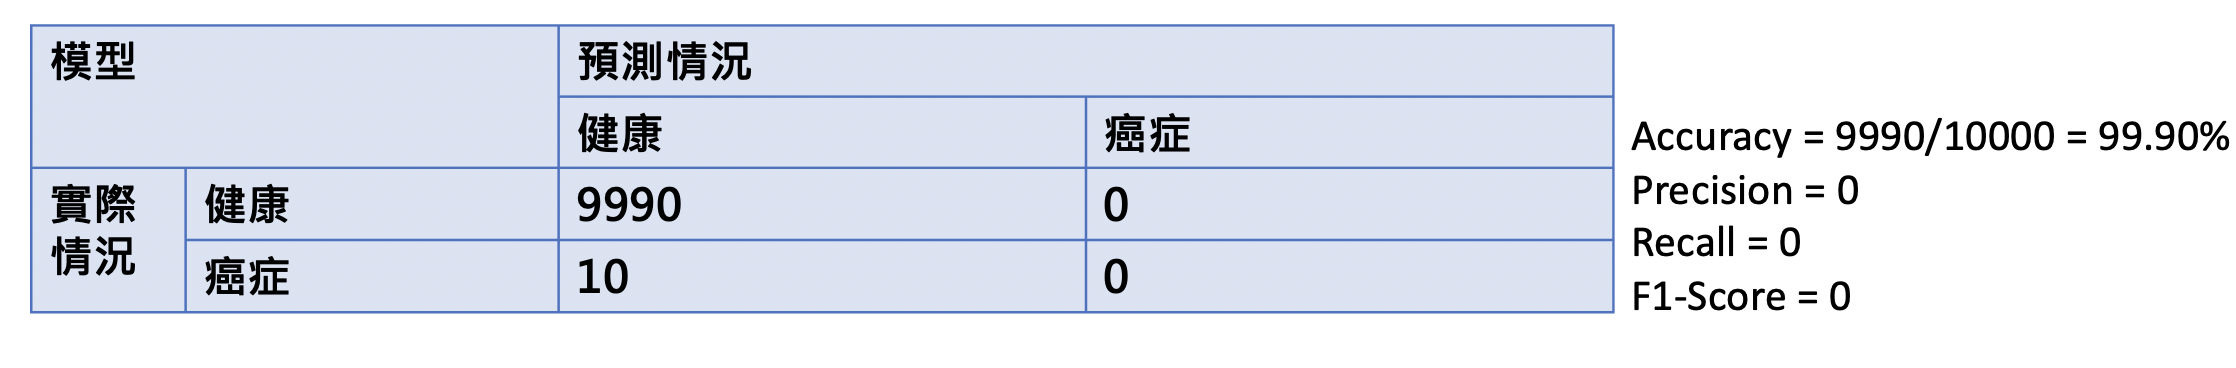

因此通常會看問題的種類而決定要使用的評估指標：

- Recall: 由於型二錯誤(FN)代價很高(實際是癌症但卻檢驗不是)

- Precision: 由於型一錯誤(FP)代價很高(例如把正常郵件辨識為垃圾郵件)

- F1 score: 綜合考量以上兩個指標

### 3.2 AUC - ROC
- AUC (Area Under Curve)
- ROC (Receiver operator characteristic)

ROC 曲線是以 FPR 為 X 軸；以 TPR 為 Y 軸

- FPR:
  $$ FPR = 1 - Specificity = \dfrac{FP}{FP+TN}$$

- TPR:
  $$ TPR = Sensitivity = recall = \dfrac{TP}{TP+FN}$$